In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/joaooliveira/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
#construindo a base
data = pd.DataFrame({"Tema": ["AEDP","AEDP","AEDP","AEDP","AEDP",
                              "ACCD","ACCD","ACCD","ACCD","ACCD",
                              "BD","BD","BD","BD","BD",
                              "CGPI","CGPI","CGPI","CGPI","CGPI",
                              "ES","ES","ES","ES","ES",
                              "ECS","ECS","ECS","ECS","ECS",
                              "IA","IA","IA","IA","IA",
                              "LFACC","LFACC","LFACC","LFACC","LFACC",
                              "LMMDEG","LMMDEG","LMMDEG","LMMDEG","LMMDEG",
                              "RCSDT","RCSDT","RCSDT","RCSDT","RCSDT",
                              "SO","SO","SO","SO","SO"],
                     "Ano": [2005,2008,2011,2014,2017]*11,
                     "Qtd": [5,3,10,8,9,
                               3,3,3,2,2,
                               1,3,0,2,2,
                               2,2,0,1,2,
                               4,2,2,3,3,
                               2,1,0,0,1,
                               1,2,0,1,2,
                               3,4,5,5,2,
                               1,4,5,5,4,
                               5,5,2,1,2,
                               3,1,3,2,1]})

In [16]:
data

,Tema,Ano,Qtd
0,AEDP,2005,5
1,AEDP,2008,3
2,AEDP,2011,10
3,AEDP,2014,8
4,AEDP,2017,9
5,ACCD,2005,3
6,ACCD,2008,3
7,ACCD,2011,3
8,ACCD,2014,2
9,ACCD,2017,2


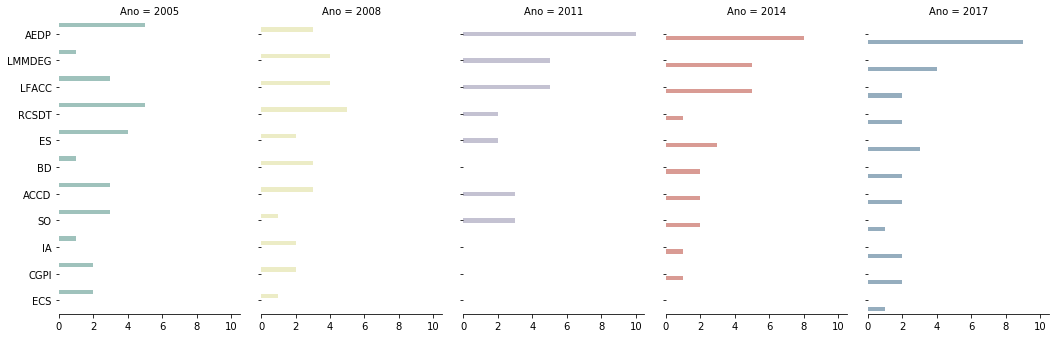

In [98]:
data_sort = data.sort_values(['Qtd'],ascending=False).reset_index(drop=True)

g = sns.catplot(x="Qtd", y="Tema", col="Ano",
                data=data_sort, saturation=.5, hue="Ano", legend_out=True,
                kind="bar", ci=None, aspect=.6, palette="Set3")
(g.set_axis_labels("", "")
#   .set_xticklabels()
#   .set_titles("")
#   .set()
  .despine(left=True)) 

,Qtd,Tema,norm
0,35,AEDP,23.33
1,19,LFACC,12.67
2,19,LMMDEG,12.67
3,15,RCSDT,10.00
4,14,ES,9.33
5,13,ACCD,8.67
6,10,SO,6.67
7,8,BD,5.33
8,7,CGPI,4.67
9,6,IA,4.00


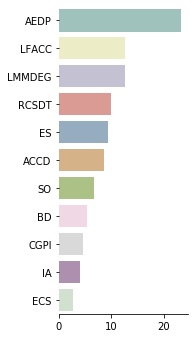

In [112]:
dataTotal = pd.DataFrame(data.groupby("Tema")["Qtd"].sum())
tempTema = data.groupby("Tema")["Qtd"].sum().index.to_list()
dataTotal["Tema"] = tempTema
dataTotal.reset_index(drop=True, inplace=True)

data_sortTotal = dataTotal.sort_values(['Qtd'],ascending=False).reset_index(drop=True)


data_sortTotal["norm"] = round((data_sortTotal["Qtd"]/data_sortTotal["Qtd"].sum())*100,2)

g = sns.catplot(x="norm", y="Tema",
                data=data_sortTotal, saturation=.5,
                kind="bar", ci=None, aspect=.6, palette="Set3")
(g.set_axis_labels("", "")
#   .set_xticklabels()
#   .set_titles("")
#   .set()
  .despine(left=True)) 

data_sortTotal